# **Valorant player's stats analysis**

### Gaming Understanding


#### Valorant is a free-to-play first-person hero shooter developed and published by Riot Games. It was released for Microsoft Windows in June 2020. The game features a variety of characters, called Agents, each with unique abilities. Players must work together to complete objectives such as planting or defusing a bomb, or eliminating all enemy players.

                                              

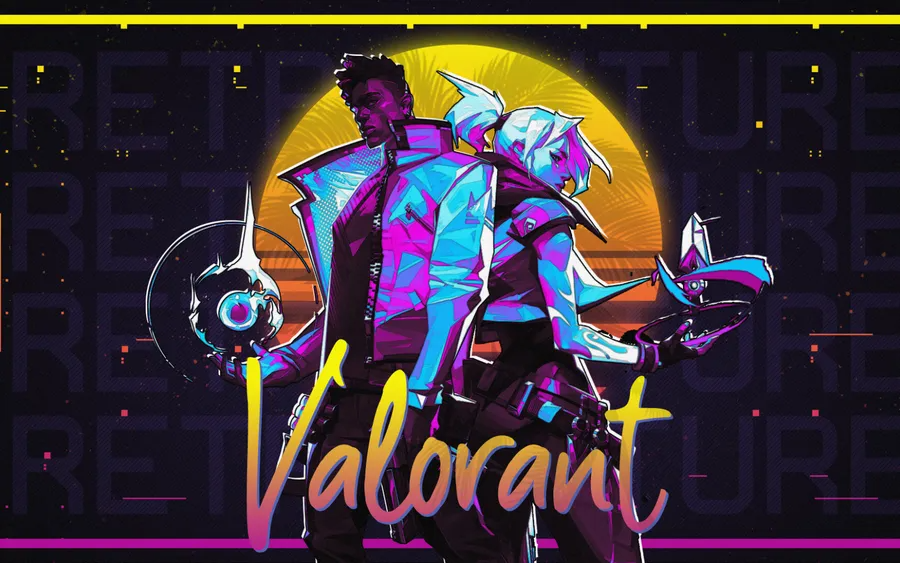

#### In this project, we focused to answer the following questions:

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ CHANGES ARE LFET TO MADE @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

1. What are the most popular Agents in Valorant?  DONE 
2. Which Agent has the highest win rate in competitive play?
3. How does the win rate of each Agent change over time?
4. Which Agent has the highest pick rate in competitive play?
5. How does the pick rate of each Agent change over time?
6. What are the most common roles in Valorant?
7. Decision tree for it 
 
 



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #used for ploting graph
plt.style.use('bmh') #used for ploting graph
plt.show() #display different types for chart and graphs

# used for data classification using decision tree 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

import seaborn as sns


### **Fetching main file player statistics**

In [2]:
df = pd.read_csv("Player Statistics.csv")
df.head()

,Player,Age,Team,Current Team,Birth Date,Maps,Kills,Deaths,Assists,KillperDeath,KDA,ACS/Map,K/Map,D/Map,A/Map
0,zekken,19.0,Sentinels,Sentinels,2005-03-19,20,381,314,90,1.21,1.50,259,19.0,15.7,4.5
1,ZmjjKK,20.0,EDward Gaming,EDward Gaming,2004-03-03,8,135,125,39,1.08,1.39,252,16.8,15.6,4.8
2,N4RRATE,21.0,Karmine Corp,Karmine Corp,2002-11-25,7,132,104,65,1.26,1.89,245,18.8,14.8,9.2
3,MiniBoo,19.0,Team Heretics,Team Heretics,2005-07-11,6,114,92,37,1.23,1.64,245,19.0,15.3,6.1
4,Autumn,23.0,FunPlus Phoenix,FunPlus Phoenix,2001-11-09,4,68,71,16,0.95,1.18,231,17.0,17.7,4.0


### **Fetching file map statistics** 


,Map,Total,Round 1,Round 2,Round 3,Playoffs
0,Ascent,6,1,0,1,4
1,Bind,7,2,1,1,3
2,Breeze,6,1,2,1,2
3,Icebox,7,2,2,1,2
4,Lotus,8,2,2,1,3


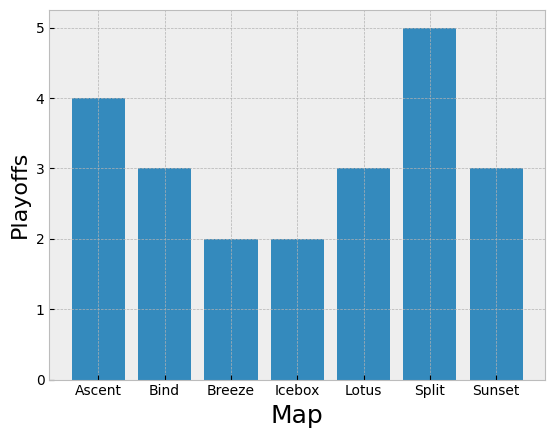

In [3]:
df1 = pd.read_csv('Map Statistics.csv')
#map na value 
x=df1['Map']
y=df1['Playoffs']
#Bar Graph
plt.xlabel('Map',fontsize=18)
plt.ylabel('Playoffs', fontsize=16)
plt.bar(x,y)
df1.head()

### **Fetching file map banned**

,Map,Total,Round 1,Round 2,Round 3,Playoffs
0,-,2,0,0,0,2
1,Ascent,10,3,4,1,2
2,Bind,9,2,3,1,3
3,Breeze,10,3,2,1,4
4,Icebox,9,2,2,1,4


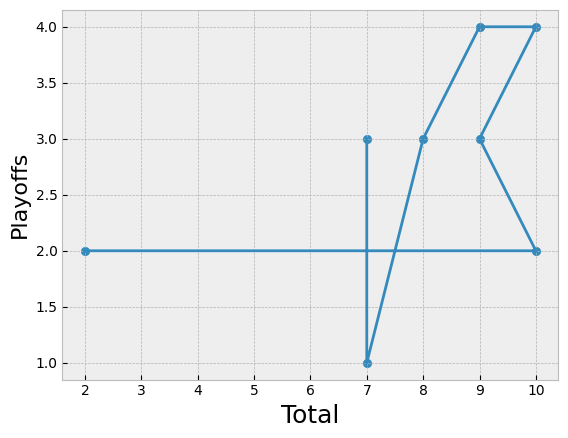

In [4]:
df2 = pd.read_csv('Maps Banned.csv')
#line Graph
x=df2['Total']
y=df2['Playoffs']
plt.xlabel('Total',fontsize=18)
plt.ylabel('Playoffs',fontsize=16)
plt.scatter(x,y)
plt.plot(x,y)
df2.head()


### **Fetching file side statistics**

In [5]:
df3=pd.read_csv('Side Statistics.csv')
df3.head()#Viewing the data record 

,Map,Atk Wins Count,Atk Wins Percentage,Def Wins Count,Def Wins Percentage
0,Ascent,54,50.0,54,50.0
1,Bind,47,49.5,48,50.5
2,Breeze,56,55.4,45,44.6
3,Icebox,68,54.0,58,46.0
4,Lotus,98,54.7,81,45.3


### **Basic steps / Basic Operations**

**1. Show all columns in dataset**

In [6]:
df.columns 

Index(['Player', 'Age', 'Team', 'Current Team', 'Birth Date', 'Maps', 'Kills',
       'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map',
       'A/Map'],
      dtype='object')

**2. Give info of player statistics**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        42 non-null     object 
 1   Age           42 non-null     float64
 2   Team          42 non-null     object 
 3   Current Team  42 non-null     object 
 4   Birth Date    42 non-null     object 
 5   Maps          42 non-null     int64  
 6   Kills         42 non-null     int64  
 7   Deaths        42 non-null     int64  
 8   Assists       42 non-null     int64  
 9   KillperDeath  42 non-null     float64
 10  KDA           42 non-null     float64
 11  ACS/Map       42 non-null     int64  
 12  K/Map         42 non-null     float64
 13  D/Map         42 non-null     float64
 14  A/Map         42 non-null     float64
dtypes: float64(6), int64(5), object(4)
memory usage: 5.1+ KB


**3. Give info of Map Satistics**

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       7 non-null      object
 1   Total     7 non-null      int64 
 2   Round 1   7 non-null      int64 
 3   Round 2   7 non-null      int64 
 4   Round 3   7 non-null      int64 
 5   Playoffs  7 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 468.0+ bytes


**4. Give info of Map banned**

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       8 non-null      object
 1   Total     8 non-null      int64 
 2   Round 1   8 non-null      int64 
 3   Round 2   8 non-null      int64 
 4   Round 3   8 non-null      int64 
 5   Playoffs  8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 516.0+ bytes


**5. Give info of Side statistics**

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Map                  7 non-null      object 
 1   Atk Wins Count       7 non-null      int64  
 2   Atk Wins Percentage  7 non-null      float64
 3   Def Wins Count       7 non-null      int64  
 4   Def Wins Percentage  7 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 412.0+ bytes


**6. No. of duplicate dataitem in Player statics:**

In [11]:
df.duplicated().sum()

0

**7.Performing decidion tree operation on the following target column :**

In [12]:
#gives no. of rows & no. of columns 
df.shape

(42, 15)

**Checking the null values in the Player's statistic** 

In [13]:
df[df.isnull().any(axis=1)].head()
#no need of data cleaning as redundant data not found


,Player,Age,Team,Current Team,Birth Date,Maps,Kills,Deaths,Assists,KillperDeath,KDA,ACS/Map,K/Map,D/Map,A/Map


In [14]:
#creating new coloum as y and coping data from df.player stats
y = df[['Assists']].copy()
y.head()

,Assists
0,90
1,39
2,65
3,37
4,16


In [15]:
x = df[['Deaths']].copy()
x.columns

Index(['Deaths'], dtype='object')

**Project by<br>**
**Tanishka Das<br>**
**Anushka Chavan<br>**
**Shruti Borhade<br>**
[GitHub](https://github.com/tanishka786/Valo-player-s-stats-analysis.git)


In [7]:
#1st Question .
#Player's Statistics .
# Sort the dataframe by Pick Rate in descending order
df_sorted = df.sort_values(by="Kills", ascending=False)

# Print the top 10 most popular agents
print(df_sorted.head(10))

       Player   Age           Team    Current Team  Birth Date  Maps  Kills  \
0      zekken  19.0      Sentinels       Sentinels  2005-03-19    20    381   
16       TenZ  23.0      Sentinels       Sentinels  2001-05-05    20    314   
19     johnqt  26.0      Sentinels       Sentinels  1998-09-21    20    293   
15  something  22.0      Paper Rex       Paper Rex  2002-02-11    17    274   
12   f0rsakeN  20.0      Paper Rex       Paper Rex  2004-03-25    17    273   
7      Meteor  24.0  Gen.G Esports   Gen.G Esports  1999-12-19    16    268   
8     t3xture  24.0  Gen.G Esports   Gen.G Esports  1999-07-20    16    264   
26    Zellsis  26.0      Sentinels       Sentinels  1998-03-02    20    263   
18     Monyet  19.0      Paper Rex  Rex Regum Qeon  2005-06-05    17    250   
30       Sacy  26.0      Sentinels       Sentinels  1997-12-02    20    249   

    Deaths  Assists  KillperDeath   KDA  ACS/Map  K/Map  D/Map  A/Map  
0      314       90          1.21  1.50      259   19.0   